In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections, numpy
import seaborn as sns 
import scipy.stats
from sklearn import preprocessing
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.stats import ks_2samp
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm



# Importation des données 

In [2]:
dataTickets = pd.read_csv("notes.csv")

# Verif données  

In [3]:
dataTickets.describe(include = "all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


In [4]:
dataTickets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [5]:
dataTickets.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Mission 0 : Stats descriptives

## Mean Var std

In [6]:
dataTicketsDescri = dataTickets.groupby("is_genuine").agg(["mean","std","var"])
dataTicketsMeans = dataTickets.groupby("is_genuine").agg("mean")
dataTicketsMeans

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


## Mean données CR

In [7]:
#centrés-réduits
prep= dataTickets[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']]
X = prep.values
names = prep.index
features = prep.columns
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
dataTicketsCR = pd.DataFrame(X_scaled, index = names, columns=features)
dataTicketsCR["is_genuine"]= dataTickets.loc[:,["is_genuine"]].values
names

RangeIndex(start=0, stop=170, step=1)

In [8]:
dataTicketsCRDescri = dataTicketsCR.groupby("is_genuine").agg(["mean","std","var","count"])
dataTicketsCRMeans = dataTicketsCR.groupby("is_genuine").agg("mean")
dataTicketsCRMStd = dataTicketsCR.groupby("is_genuine").agg("std")
dataTicketsCRDescri

diagonal                           height_left            \
                mean       std       var count        mean       std   
is_genuine                                                             
False      -0.166404  0.975591  0.951777    70    0.551873  0.716869   
True        0.116483  1.010212  1.020528   100   -0.386311  0.996447   

                           height_right            ... margin_low        \
                 var count         mean       std  ...        var count   
is_genuine                                         ...                    
False       0.513901    70     0.658940  0.767115  ...   0.596910    70   
True        0.992906   100    -0.461258  0.886064  ...   0.201849   100   

           margin_up                              length                      \
                mean       std       var count      mean       std       var   
is_genuine                                                                     
False       0.696580  0.785446  0.616926    70 -0.986951  0.734418  0.539369   
True       -0.487606  0.839014  0.703944   100  0.690866  0.412787  0.170393   

                  
           count  
is_genuine        
False         70  
True         100  

[2 rows x 24 columns]

In [9]:
labels = dataTicketsCRMeans.columns
genuineTMean = dataTicketsCRMeans.loc[1].values
falseTMean = dataTicketsCRMeans.loc[0].values
genuineTStd =dataTicketsCRMStd.loc[1].values
falseTStd =dataTicketsCRMStd.loc[0].values


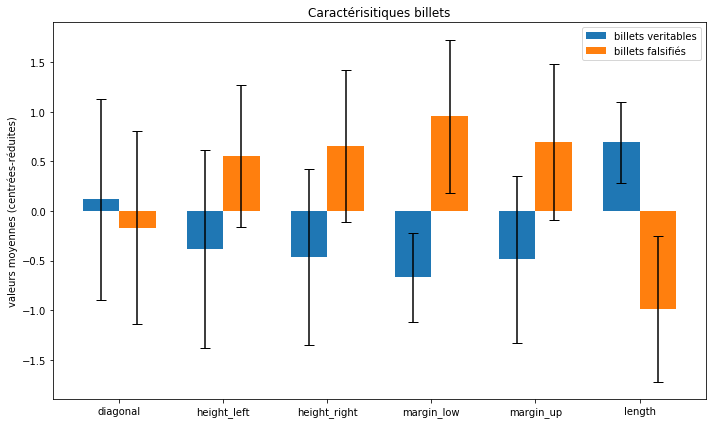

In [10]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, genuineTMean,width, yerr=genuineTStd,capsize=5, label='billets veritables')
rects2 = ax.bar(x + width/2, falseTMean, width,yerr=falseTStd,capsize=5, label='billets falsifiés')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('valeurs moyennes (centrées-réduites)')
ax.set_title('Caractérisitiques billets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#figsize
fig.set_figheight(6)
fig.set_figwidth(10)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig.tight_layout()

plt.show()

## distribution  et  stats desctiptivec (Mean, med, var, std, skew,kurto + KS) 

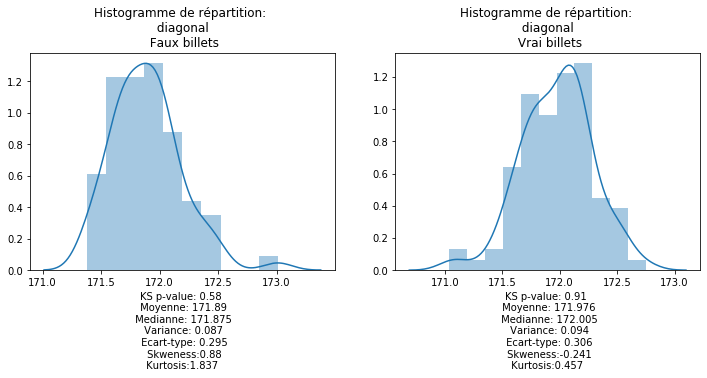

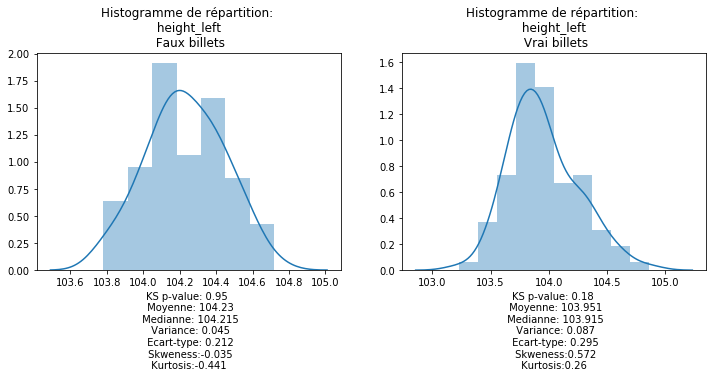

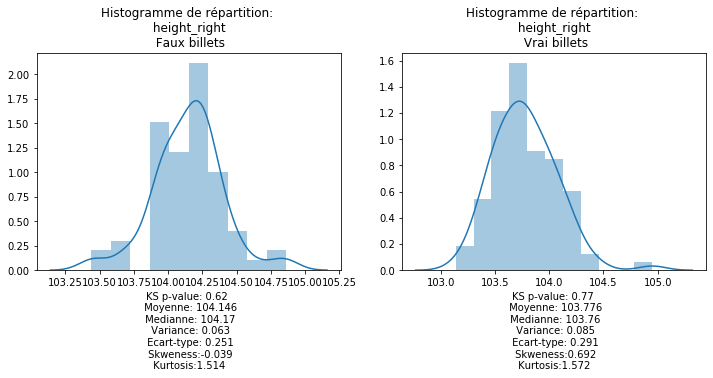

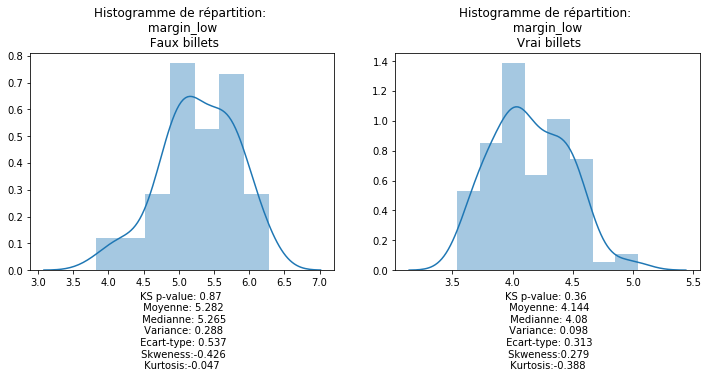

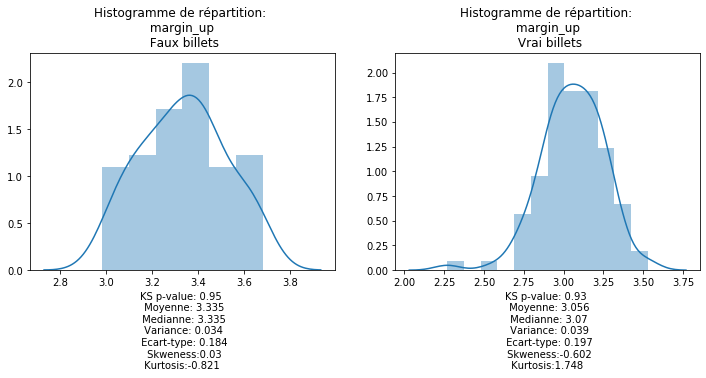

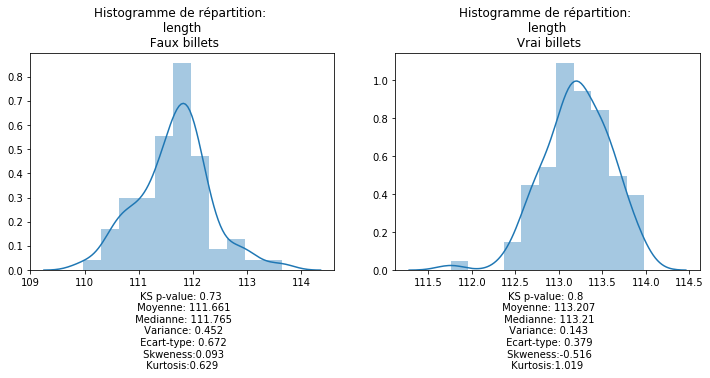

In [11]:
for column in prep:
    fig, ax =plt.subplots(1,2)
    sns.distplot(dataTickets[column][dataTickets["is_genuine"]==False],
                 ax = ax[0]).title.set_text("Histogramme de répartition: \n {} \n Faux billets".format(column))
    sns.distplot(dataTickets[column][dataTickets["is_genuine"]==True],
                 ax = ax[1]).title.set_text("Histogramme de répartition: \n {} \n Vrai billets".format(column))
    ax[0].set(xlabel="KS p-value: {} \n Moyenne: {}\n Medianne: {}\n Variance: {}\n Ecart-type: {}\n Skweness:{}\n Kurtosis:{} ".format(
        ks_2samp(dataTickets[column][dataTickets["is_genuine"]==False],
                 list(numpy.random.normal(numpy.mean(dataTickets[column][dataTickets["is_genuine"]==False]),
                                          numpy.std(dataTickets[column][dataTickets["is_genuine"]==False]),10000))).pvalue.round(2),
        round(dataTickets[column][dataTickets["is_genuine"]==False].mean(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==False].median(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==False].var(ddof=0),3),
        round(dataTickets[column][dataTickets["is_genuine"]==False].std(ddof=0),3),
        round(dataTickets[column][dataTickets["is_genuine"]==False].skew(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==False].kurtosis(),3)))
   

    ax[1].set(xlabel="KS p-value: {} \n Moyenne: {}\n Medianne: {}\n Variance: {}\n Ecart-type: {}\n Skweness:{}\n Kurtosis:{} ".format(
        ks_2samp(dataTickets[column][dataTickets["is_genuine"]==True],
                 list(numpy.random.normal(numpy.mean(dataTickets[column][dataTickets["is_genuine"]==True]),
                                          numpy.std(dataTickets[column][dataTickets["is_genuine"]==True]),10000))).pvalue.round(2),
        round(dataTickets[column][dataTickets["is_genuine"]==True].mean(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==True].median(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==True].var(ddof=0),3),
        round(dataTickets[column][dataTickets["is_genuine"]==True].std(ddof=0),3),
        round(dataTickets[column][dataTickets["is_genuine"]==True].skew(),3),
        round(dataTickets[column][dataTickets["is_genuine"]==True].kurtosis(),3)))
    

    
    fig.set_figheight(4)
    fig.set_figwidth(12)

    plt.show()


## Corrélation  entre variable (all, false, true)

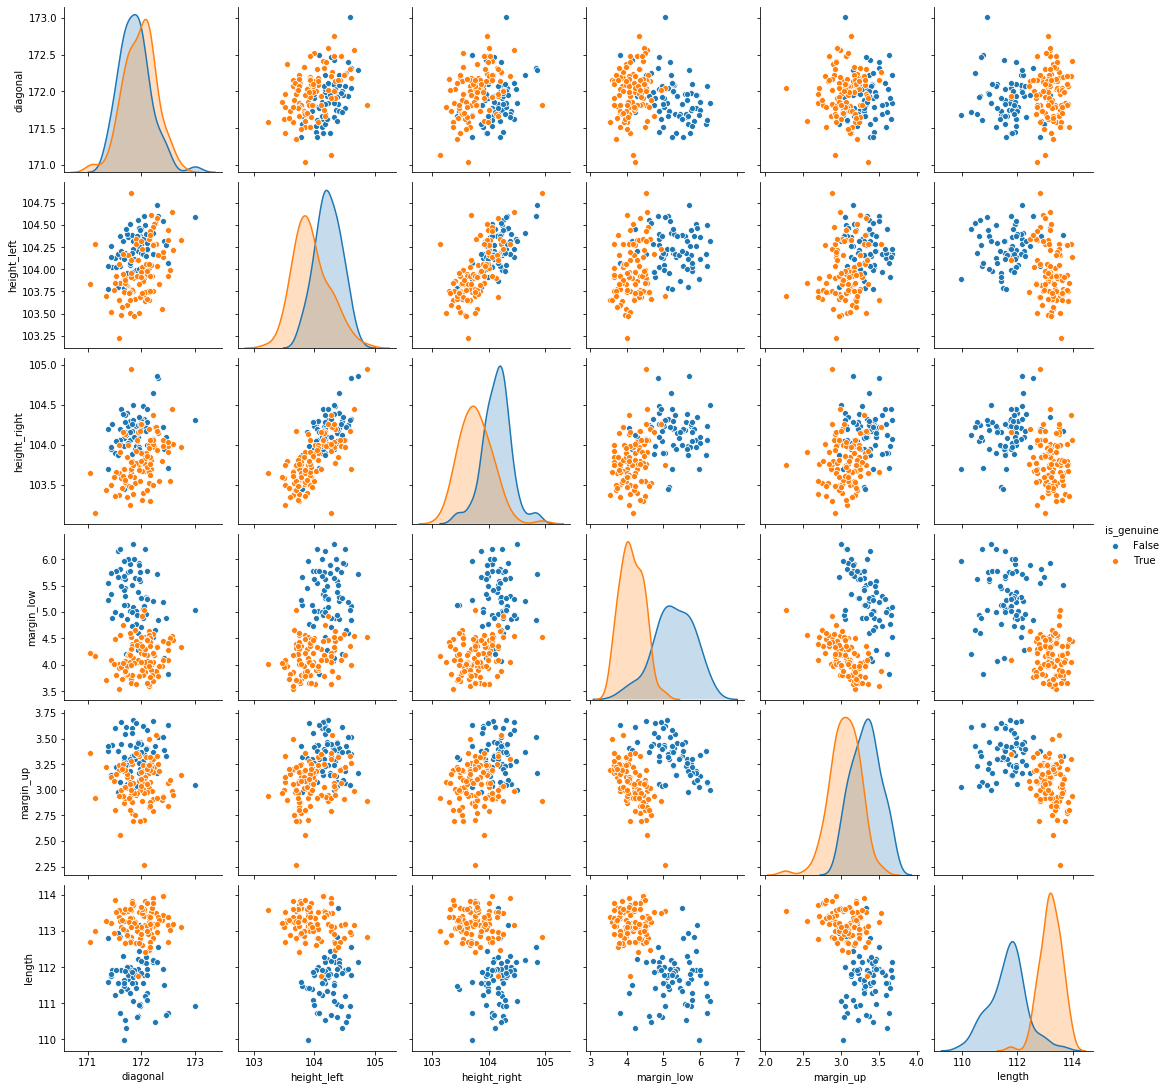

In [12]:
dataTicketsPP = dataTickets.reset_index()
sns.pairplot(dataTickets, hue='is_genuine', height=2.5 )


# Mission 1: ACP 

In [13]:
# nombres de composantes 
n_comp = 6

#préparation données ACP
X = prep.values
names = prep.index

#centrage et réduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## éboulis des valeurs propres

Text(0.5, 1.0, 'Eboulis des valeurs propres')

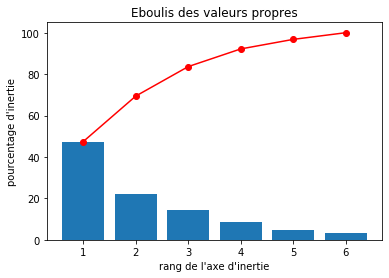

In [14]:
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")


## cercles de corrélations 

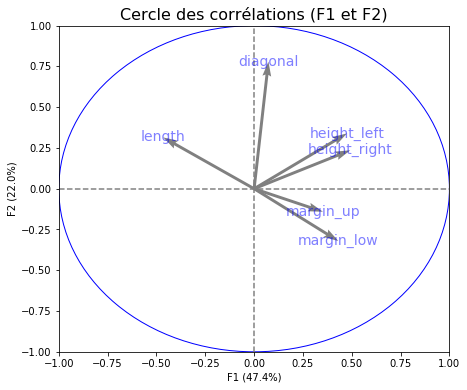

In [15]:
#cercle des corrélations
axis_ranks= [(0,1)]
pcs = pca.components_
for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
    if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                    plt.text(x, y, np.array(features)[i], fontsize='14', ha='center', va='center', rotation=0, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1),size = 16)


In [16]:
#tableau des composantes 
f1 = pca.components_[0].round(2)
f2 = pca.components_[1].round(2)
ar = np.concatenate(([f1],[f2]))
composantes = pd.DataFrame(ar,
                          index = ["f1","f2"],
                          columns = prep.columns)
composantes

,diagonal,height_left,height_right,margin_low,margin_up,length
f1,0.07,0.48,0.49,0.43,0.35,-0.47
f2,0.78,0.34,0.24,-0.32,-0.14,0.31


F1: lengt neg/ height & margin pos  
F2: Diag  
F3: margin pos: low , neg:up

##  projection des individus 

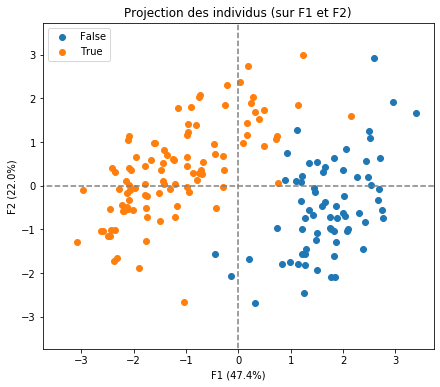

In [17]:
axis_ranks= [(0,1)]
X_projected = pca.transform(X_scaled)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = dataTicketsCR.is_genuine
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            plt.legend()

                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))


F1: Lenght semble influer sur le vrai/faux ainsi qu'un ou plusieurs autres facteurs liés à F1  
F2: Pas de différence d'influence nette diagonale
F3: semble pas de différence entre margin up et low

## Contributions des individus à l'inertie totale et Qualité de représentation des individus

In [18]:
#calcul contributions 
dataContrib =dataTickets.copy()
di = np.sum(X_scaled**2,axis=1)
dataContrib["di"] = di

In [19]:
# calul de la qualité 
coord = pca.fit_transform(X_scaled)
cos2 = coord**2
for j in range(prep.shape[1]):
    cos2[:,j] = cos2[:,j]/di
dataContrib["qualite_sur_F1"] = cos2[:,0]
dataContrib["qualite_sur_F2"] = cos2[:,1]
dataContribQuali = dataContrib[["is_genuine","di","qualite_sur_F1","qualite_sur_F2"]]

In [20]:
#stat descri 
dataContribQualiStat = dataContribQuali.groupby("is_genuine").agg(["mean","std","var","count"])
dataContribQualiStat

di                            qualite_sur_F1            \
                mean       std        var count           mean       std   
is_genuine                                                                 
False       6.893249  3.395650  11.530436    70       0.496250  0.250674   
True        5.374726  3.285279  10.793060   100       0.455141  0.296282   

                           qualite_sur_F2                            
                 var count           mean       std       var count  
is_genuine                                                           
False       0.062838    70       0.198254  0.213095  0.045410    70  
True        0.087783   100       0.226626  0.257960  0.066544   100

In [21]:
#vvérifications la théorie -somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [22]:
#qui contribue le plus 
contribPlus = dataContribQuali.nlargest(20,'di')
contribPlus = contribPlus.groupby("is_genuine").count()
contribPlus

,di,qualite_sur_F1,qualite_sur_F2
is_genuine,,,
False,10,10,10
True,10,10,10


# Mission 2 : K-Means et et visu sur 1er plan factoriel

## Détermination du nombre de cluster

In [23]:
# détermination 
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

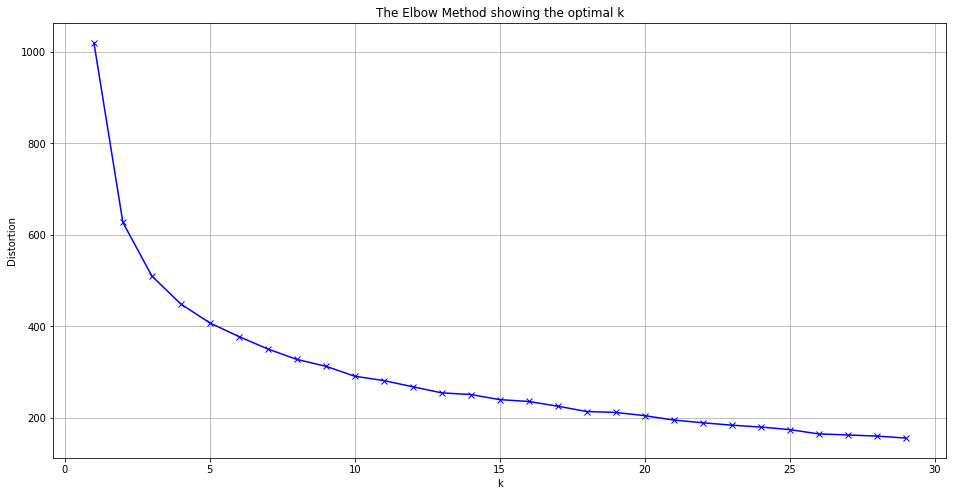

In [24]:
# graphique de distortion
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()


la logique de l'étude veut qu'on observe 2 clusters : vrai ou faux billets. Moins de distortion avec 5. 

## Clusterisation

In [25]:
# K-means 
n_clust = 2
km = KMeans (n_clusters = n_clust)
km.fit(X_scaled)
clustersKm = km.labels_
collections.Counter(clustersKm)

Counter({1: 76, 0: 94})

oscillation entre: 77/93 et 76/94

## projections des individus 

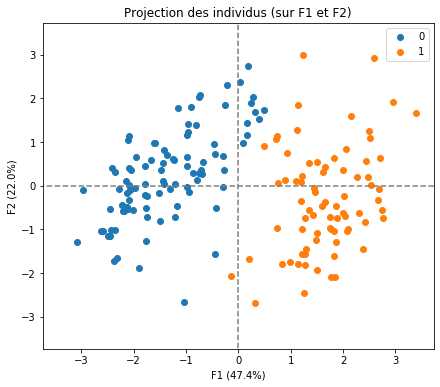

In [26]:
axis_ranks= [(0,1)]
X_projected = pca.transform(X_scaled)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = clustersKm
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            plt.legend()

                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

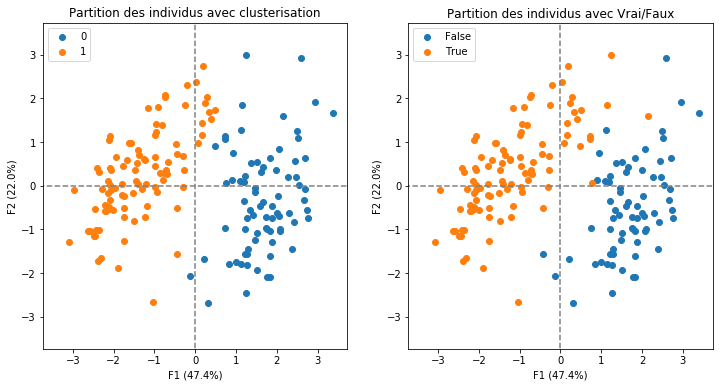

In [27]:
axis_ranks= [(0,1)]
X_projected = pca.transform(X_scaled)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig,(ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
        
            # affichage des points
            clustersKm = 1 - clustersKm
            illustrative_var = clustersKm
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    ax1.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            ax1.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            ax1.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            ax1.set_title("Partition des individus avec clusterisation")
            ax1.plot([-100, 100], [0, 0], color='grey', ls='--')
            ax1.plot([0, 0], [-100, 100], color='grey', ls='--')
            ax1.set_xlim([-boundary,boundary])
            ax1.set_ylim([-boundary,boundary])
            ax1.legend()
            
            illustrative_var = dataTicketsCR.is_genuine
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    ax2.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            ax2.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            ax2.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            ax2.set_title("Partition des individus avec Vrai/Faux")
            ax2.plot([-100, 100], [0, 0], color='grey', ls='--')
            ax2.plot([0, 0], [-100, 100], color='grey', ls='--')
            ax2.set_xlim([-boundary,boundary])
            ax2.set_ylim([-boundary,boundary])          
            ax2.legend()

## différence clusterisation supervisée/ vrai-faux

In [28]:
dataTickets["clusters"]= clustersKm
print("faux billets {}".format(
    dataTickets[(dataTickets['clusters']== 0)& (dataTickets['is_genuine']== False)].shape[0]))
print("faux billets {}".format(
    dataTickets[(dataTickets['clusters']== 1)& (dataTickets['is_genuine']== False)].shape[0]))
print("Vrai billets {}".format(
    dataTickets[(dataTickets['clusters']== 0)& (dataTickets['is_genuine']== True)].shape[0]))
print("Vrai billets {}".format(
    dataTickets[(dataTickets['clusters']== 1)& (dataTickets['is_genuine']== True)].shape[0]))

faux billets 69
faux billets 1
Vrai billets 7
Vrai billets 93


In [29]:
VPKmeans=92
FNKmeans = 8
VNKmeans = 69
FPKmeans = 1

#sensibilité
print ("Le taux de sensibilité est de : {}".format(VPKmeans / (VPKmeans+FNKmeans)*100))
#Spécificité 
print ("Le taux de spécificité est de : {}".format(VNKmeans / (VNKmeans+FPKmeans)*100))
#Taux d'erreur :
print ("Le taux d'erreur est de : {}".format((FNKmeans+FPKmeans)*100/(VPKmeans+FNKmeans+VNKmeans+FPKmeans)))


Le taux de sensibilité est de : 92.0
Le taux de spécificité est de : 98.57142857142858
Le taux d'erreur est de : 5.294117647058823


## Différence significative entre cluster

In [30]:
def Diff_significative_avec_verif_variance(dfCible):
    df = dfCible.copy()
    col = df.columns.values
    col = np.delete(col,0)
    tableauPvalue= pd.DataFrame (columns = col, index = ["P-value différence entre les deux clusters"])

    for variable in col:
        x = np.array(df[df["clusters"]== df["clusters"].unique()[0]][variable])
        y = np.array(df[df["clusters"]== df["clusters"].unique()[1]][variable])
        if np.var(x, ddof=1)>np.var(y, ddof=1):
            f = np.var(x, ddof=1)/np.var(y, ddof=1)
            dfn = x.size-1
            dfd = y.size-1
            a = 1-scipy.stats.f.cdf(f,dfn,dfd)
        else:
            f = np.var(y, ddof=1)/np.var(x, ddof=1)
            dfn = y.size-1
            dfd = x.size-1
            a = 1-scipy.stats.f.cdf(f,dfn,dfd)
            
        if a<0.05:
            b = scipy.stats.ttest_ind(df[df["clusters"]== df["clusters"].unique()[0]][variable],
                                      df[df["clusters"]== df["clusters"].unique()[1]][variable],
                                      equal_var=False).pvalue
            tableauPvalue.loc["P-value différence entre les deux clusters",variable]=b
        else :
            c =scipy.stats.ttest_ind(df[df["clusters"]== df["clusters"].unique()[0]][variable],
                                     df[df["clusters"]== df["clusters"].unique()[1]][variable], 
                                     equal_var=True).pvalue
            tableauPvalue.loc["P-value différence entre les deux clusters",variable]=c
        
    tableauPvalueBon = tableauPvalue.astype("float64")
    ax = plt.axes()
    hm = sns.heatmap(tableauPvalueBon,annot=True,yticklabels=False)
    hm.set_xticklabels(hm.get_xticklabels(), size = 12) 
    ax.set_title("Différence significative pValue", size = 16)
    plt.ylabel("P-value différence \n entre les deux clusters",size = 12)

    plt.show()  
        

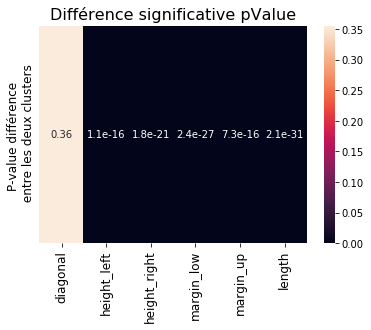

In [31]:
Diff_significative_avec_verif_variance(dataTickets[['clusters','diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']])

# Mission 3 : reg logistique 

## Création d'une data de modélisation et d'un data essai 

In [32]:
#Data billets vrai
dataTicketsTrue = dataTickets[dataTickets["is_genuine"]== True]
msk = np.random.rand(len(dataTicketsTrue)) < 0.9
trainTrue = dataTicketsTrue[msk]
testTrue = dataTicketsTrue[~msk]


In [33]:
#Data billets Faux
dataTocketsFalse = dataTickets[dataTickets["is_genuine"]== False]
trainFalse=dataTocketsFalse.sample(frac=0.9,random_state=200) #random state is a seed value
testFalse=dataTocketsFalse.drop(trainFalse.index)


In [34]:
train = trainFalse.append(trainTrue)
test = testFalse.append(testTrue)

## regression logistique 

In [35]:
def is_genuineBol(col):
    if col==False:
        val=0
    else:
        val=1
    return val

In [36]:
train["is_genuineBol"]=train["is_genuine"].apply(is_genuineBol)
test["is_genuineBol"]=test["is_genuine"].apply(is_genuineBol)
dataTickets["is_genuineBol"]=dataTickets["is_genuine"].apply(is_genuineBol)

Le test avec toues les variables, indique un message d'erreur :
"PerfectSeparationError: Perfect separation detected, results not available"
cette séparation parfaite peut être enlevé en supprimant une des trois varaiables :
-margin up
-margin low
-length
 
Retrait de margin_up car elle semble moins différencier les vrai des faux billets (graphique de distibution)

In [37]:
# Test sans margin up
reg_log = smf.glm('is_genuineBol~diagonal+height_left+height_right+margin_low+length',
                   data=train, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          is_genuineBol   No. Observations:                  152
Model:                            GLM   Df Residuals:                      146
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.0890
Date:                Tue, 06 Oct 2020   Deviance:                       8.1779
Time:                        12:56:35   Pearson chi2:                     8.53
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1472.4441   1591.172     -0.925   

In [38]:
# Retrait de  height right car moins significative
reg_log = smf.glm('is_genuineBol~diagonal+height_left+margin_low+length',
                   data=train, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          is_genuineBol   No. Observations:                  152
Model:                            GLM   Df Residuals:                      147
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.1322
Date:                Tue, 06 Oct 2020   Deviance:                       8.2643
Time:                        12:56:35   Pearson chi2:                     8.58
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1359.4842   1497.472     -0.908      

In [39]:
# Retrait de  height left car moins significative
reg_log = smf.glm('is_genuineBol~diagonal+margin_low+length',
                   data=train, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          is_genuineBol   No. Observations:                  152
Model:                            GLM   Df Residuals:                      148
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.1482
Date:                Tue, 06 Oct 2020   Deviance:                       8.2964
Time:                        12:56:35   Pearson chi2:                     8.68
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1413.2433   1438.432     -0.982      0.3

In [40]:
# Retrait de  diagonal car moins significative
reg_log = smf.glm('is_genuineBol~margin_low+length',
                   data=train, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          is_genuineBol   No. Observations:                  152
Model:                            GLM   Df Residuals:                      149
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.2242
Date:                Tue, 06 Oct 2020   Deviance:                       8.4485
Time:                        12:56:35   Pearson chi2:                     9.55
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -909.3001    374.511     -2.428      0.0

In [41]:
# établissement des paramètres de la courbe logistique 
beta1 = reg_log.params[0]
beta2 = reg_log.params[1]
beta3 = reg_log.params[2]

etablisssment de l'équation de la courbe logistique


<br><br><center><font size="10">$f(x) = \frac{e^{\beta_{1}+\beta_{2}margin low+\beta_{3}length}}{1+e^{\beta_{1}+\beta_{2}margin low+\beta_{3}length}}$</font></center>


## Vérfication reg logistique 

In [42]:
def verif_modelisation (data):
    a=[]
    for x in range(len(data)):
        if np.exp(beta1+beta2*data.loc[x,"margin_low"]+beta3*data.loc[x,"length"])/(1+np.exp(beta1+beta2*data.loc[x,"margin_low"]+beta3*data.loc[x,"length"]))>= 0.5:
            a = a+[1]
        else:
            a = a+[0]
    return a 

In [43]:
dataTickets["verif"]= verif_modelisation(dataTickets)

In [44]:
dataTickets[(dataTickets['verif']== 1)& (dataTickets['is_genuineBol']== 0)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clusters,is_genuineBol,verif
102,False,171.94,104.21,104.1,4.28,3.47,112.23,0,0,1


In [45]:
np.exp(beta1+beta2*4.28+beta3*112.23)/(1+np.exp(beta1+beta2*4.28+beta3*112.23))

0.8637342656715369

In [46]:
dataTickets[(dataTickets['verif']== 0)& (dataTickets['is_genuineBol']==1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clusters,is_genuineBol,verif
9,True,172.14,104.34,104.2,4.63,3.02,112.47,0,1,0


In [47]:
np.exp(beta1+beta2*4.63+beta3*112.47)/(1+np.exp(beta1+beta2*4.63+beta3*112.47))

0.3528388332684654

In [48]:
dataTickets["clusters"]= clustersKm
print("faux billets {}".format(
    dataTickets[(dataTickets['verif']== 0)& (dataTickets['is_genuine']== False)].shape[0]))
print("faux billets {}".format(
    dataTickets[(dataTickets['verif']== 1)& (dataTickets['is_genuine']== False)].shape[0]))
print("Vrai billets {}".format(
    dataTickets[(dataTickets['verif']== 0)& (dataTickets['is_genuine']== True)].shape[0]))
print("faux billets {}".format(
    dataTickets[(dataTickets['verif']== 1)& (dataTickets['is_genuine']== True)].shape[0]))

faux billets 69
faux billets 1
Vrai billets 1
faux billets 99


In [49]:
VP=99
FN =1
VN = 69
FP = 1

#sensibilité
print ("Le taux de sensibilité est de : {}".format(99 / (99+1)*100))
#Spécificité 
print ("Le taux de spécificité est de : {}".format(69 / (69+1)*100))
#Taux d'erreur :
print ("Le taux d'erreur est de : {}".format((2*100/170)))


Le taux de sensibilité est de : 99.0
Le taux de spécificité est de : 98.57142857142858
Le taux d'erreur est de : 1.1764705882352942


In [50]:
99/(99+(0.5*(1+1)))

0.99

## illustrato des erreurs 

In [51]:
dataTicketsCRillu = dataTicketsCR.copy()
dataTicketsCRillu.loc[102,"is_genuine"]='FP'
dataTicketsCRillu.loc[9,"is_genuine"]="FN"
dataTicketsCRillu = dataTicketsCRillu.astype({'is_genuine': 'str'})

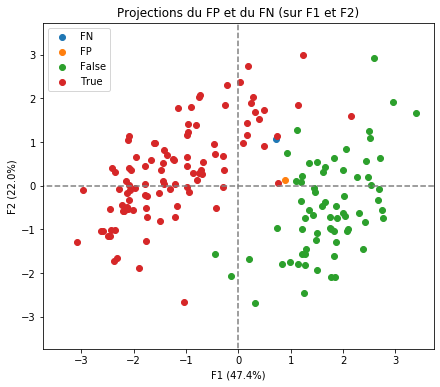

In [52]:
axis_ranks= [(0,1)]
X_projected = pca.transform(X_scaled)
for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            illustrative_var = dataTicketsCRillu.is_genuine
            for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=1, label=value)
            plt.legend()

                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projections du FP et du FN (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)